Técnicas Lasso y Elastic-Net --- 5:42 min
===

* 5:42 min | Ultima modificación: Octubre 17, 2021 | [YouTube](https://youtu.be/7sO8LhcjxNs)

## Regresión Lasso

Esta metodologías tiende a preferir soluciones con pocos coeficientes diferentes de cero, por lo que reduce la cantidad de caracterisitcas sobre las cuales la solución es dependiente.

$$ \frac{1}{2N} \sum_{i=1}^N (y_i - g(x_i))^2 + \alpha \sum_{p=1} |w_p|$$

## Regresión Elastic-Net

Este modelo de regresión usa simultáneamente las normas $l_1$ (Lasso) y $l_2$ (Ridge), buscando modelos donde unos cuantos coeficientes son diferentes de cero (Lasso), pero conservando las propiedades de regularización del modelo Ridge. Cuando hay varias características correlacionadas, Lasso tiende a seleccionar una de ellas de forma aleatoria, mientras que elastic-net tiende a seleccionarlas todas.

$$ \frac{1}{2N} \sum_{i=1}^N (y_i - g(x_i))^2 + \alpha \rho \sum_{p=1} |w_p| + \frac{\alpha (1-\rho)}{2} \sum_{p=1} w_p^2$$ 

## Comparación

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import (
    ElasticNet,
    ElasticNetCV,
    Lasso,
    LassoCV,
    Ridge,
    RidgeCV,
)
from sklearn.model_selection import RepeatedKFold, cross_validate

In [2]:
#
# Carga de datos
#
diabetes = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/diabetes.csv"
)

feature_names = diabetes.columns[:-1]
n_features = len(feature_names)

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
#
# Patrones de entrenamiento
#
y = diabetes.pop("Y")
X = diabetes.values

In [4]:
#
# Coeficientes de un modelo de regresión lineal
# computados sobre distintos subconjuntos de
# datos
#
ridgeCV = RidgeCV(alphas=np.logspace(-6, 6, 100))
ridgeCV.fit(X, y)
ridgeCV.alpha_

0.004328761281083062

In [5]:
lassoCV = LassoCV(alphas=np.logspace(-6, 6, 100))
lassoCV.fit(X, y)
lassoCV.alpha_

0.0032745491628777285

In [6]:
elasticNetCV = ElasticNetCV(
    alphas=np.logspace(-6, 6, 100), l1_ratio=1 - 0.9 * np.logspace(0, -3, 30)
)
elasticNetCV.fit(X, y)
display(
    elasticNetCV.alpha_,
    elasticNetCV.l1_ratio_,
)

0.0024770763559917113

0.9991

In [7]:
repeatedKFold = RepeatedKFold(n_splits=5, n_repeats=5)

In [8]:
ridge = Ridge(alpha=ridgeCV.alpha_)

cv_model_ridge = cross_validate(
    ridge,
    X,
    y,
    cv=repeatedKFold,
    return_estimator=True,
)

coefs_ridge = pd.DataFrame(
    [estimator.coef_ for estimator in cv_model_ridge["estimator"]],
    columns=feature_names,
)
coefs_ridge["model"] = "RIDGE"

coefs_ridge.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,model
0,24.928540,-242.646394,455.392545,363.303034,-486.051407,185.116550,22.533379,264.275379,615.233682,25.023913,RIDGE
1,16.163892,-314.128181,477.409411,340.427086,-231.856003,49.863305,-131.690393,149.203000,547.425144,75.914868,RIDGE
2,-54.504804,-233.012530,596.993511,294.209495,-658.768994,371.905841,7.857217,98.193046,712.928805,119.789791,RIDGE
3,-21.616896,-210.015222,500.145707,316.507762,-545.679769,326.703589,-46.442249,78.831991,682.727977,52.611570,RIDGE
4,-1.647920,-193.158699,561.811751,308.841652,-521.572939,221.839895,1.630248,144.535774,622.912260,75.211032,RIDGE


In [9]:
lasso = Lasso(alpha=lassoCV.alpha_)

cv_model_lasso = cross_validate(
    lasso,
    X,
    y,
    cv=repeatedKFold,
    return_estimator=True,
)

coefs_lasso = pd.DataFrame(
    [estimator.coef_ for estimator in cv_model_lasso["estimator"]],
    columns=feature_names,
)
coefs_lasso["model"] = "LASSO"

coefs_lasso.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,model
0,27.843174,-252.735935,559.218852,325.665770,-671.969666,395.803200,-1.982561,42.403798,763.159888,22.925571,LASSO
1,-12.689805,-202.623593,501.929697,365.766047,-552.203699,322.515205,5.289431,110.377867,719.465119,33.504007,LASSO
2,-23.791882,-231.590823,518.095519,350.722078,-818.545677,473.560304,146.710402,303.662949,647.394289,120.248107,LASSO
3,-37.216709,-239.279399,556.056922,253.411652,-580.340650,347.791182,8.223673,109.762884,699.224160,87.244429,LASSO
4,-0.766497,-246.416009,480.574220,311.490735,-257.778267,0.000000,-137.748028,157.318861,537.164094,76.220112,LASSO


In [10]:
elasticNet = ElasticNet(alpha=elasticNetCV.alpha_, l1_ratio=elasticNetCV.l1_ratio_)

cv_model_elasticNet = cross_validate(
    elasticNet,
    X,
    y,
    cv=repeatedKFold,
    return_estimator=True,
)

coefs_elasticNet = pd.DataFrame(
    [estimator.coef_ for estimator in cv_model_elasticNet["estimator"]],
    columns=feature_names,
)
coefs_elasticNet["model"] = "ELASTICNET"

coefs_elasticNet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,model
0,14.762858,-260.754859,542.959669,323.629094,-825.425274,460.625006,118.041856,186.994180,714.454860,87.239335,ELASTICNET
1,-30.880380,-293.822228,413.517197,357.422242,-432.586012,331.659011,-110.644481,72.750746,709.195879,66.705927,ELASTICNET
2,11.916888,-205.227345,542.964237,355.406385,-680.181074,339.103003,64.507229,139.081282,663.388366,45.709020,ELASTICNET
3,-19.677778,-177.746271,533.540177,276.878048,-639.811844,355.203690,47.989532,206.004796,695.337629,18.285635,ELASTICNET
4,-11.586814,-250.916561,556.604284,298.517946,-89.167103,-108.299374,-191.382147,103.087251,513.048187,117.959113,ELASTICNET


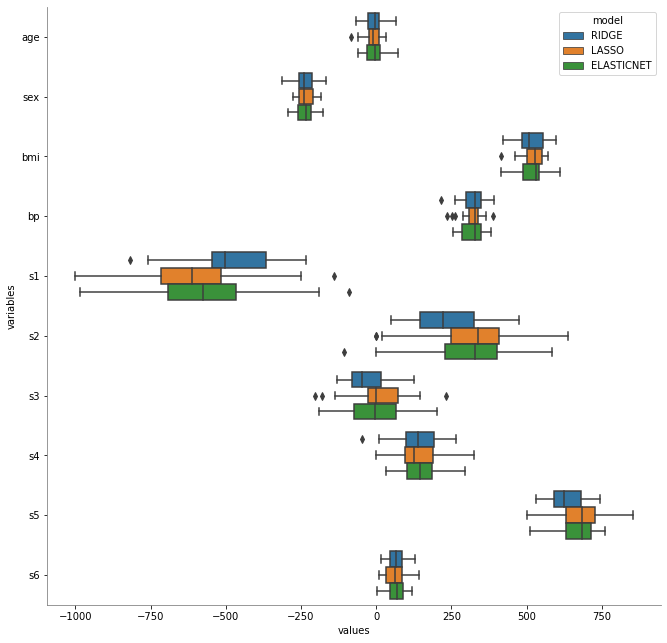

In [12]:
#
# Comparación
#
coefs = pd.concat(
    [coefs_ridge, coefs_lasso, coefs_elasticNet],
    ignore_index=True,
)

coefs = pd.melt(
    coefs,
    id_vars="model",
    var_name="variables",
    value_name="values",
)

plt.figure(figsize=(11, 11))
sns.boxplot(x="values", y="variables", data=coefs, hue="model")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()